# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [344]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [345]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)
df_target = housing.target
df_features = housing.data

1. Use any filter method to select the best features

In [346]:
from sklearn.feature_selection import f_classif

threshold = 5
high_score_features = []
feature_scores = f_classif(df_features, df_target.values.ravel())[0]


for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:

      high_score_features.append(f_name)

df_wine_fc = df_features[high_score_features]
df_wine_fc.columns

Index(['MedInc', 'Latitude', 'Population', 'HouseAge', 'Longitude'], dtype='object')

In [347]:
print("Filtered ",res.columns)

Filtered  Index(['MedInc', 'AveOccup'], dtype='object')


In [348]:
X = df[res.columns]
y = housing.target
X_train, X_test1, y_train, y_test1 = train_test_split(X, y,  random_state=1)

tree1.fit(X_train, y_train)
y_pred1 = tree1.predict(X_test1)

PEARSON CORRELATION

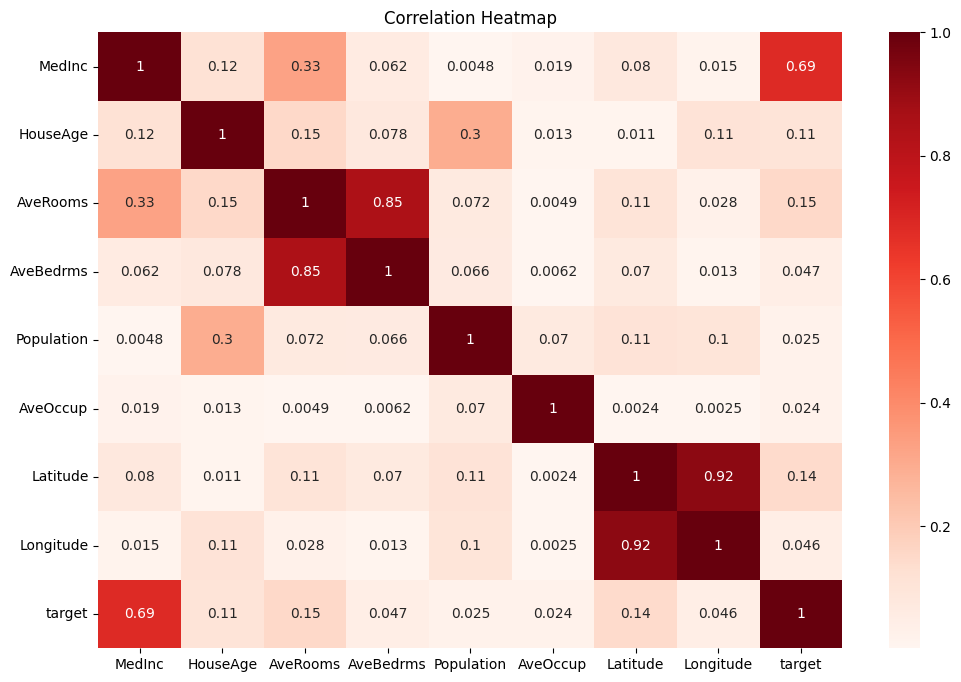

Reduced DataFrame Columns: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'target'],
      dtype='object')


In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['target'] = housing.target # Add target variable to the DataFrame


cor = df_housing.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation Heatmap")
plt.show()


corr_threshold = 0.85


upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
df_housing_reduced = df_housing.drop(columns=to_drop)
rget_column = 'median_house_value'
df_housing_reduced = df_housing_reduced[
    [col for col in df_housing_reduced.columns if col != target_column]
]


print("Reduced DataFrame Columns:", df_housing_reduced.columns)

In [350]:

df_housing_corr = df.copy()

upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))

corr_between_features = 0.8

to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
df_housing_corr = df_housing_corr.drop(columns=to_drop, axis=1)
df_housing_corr = df_housing_corr[[cols for cols in df_housing_corr.columns if cols != 'quality']]
'df_housing_corr', df_housing_corr.columns

('df_housing_corr',
 Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
        'MedHouseVal'],
       dtype='object'))

2. Use any wrapper method to select the best features

In [351]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [352]:
threshold = 5
rfr =RandomForestRegressor(n_estimators=200, random_state=0, max_depth=3)
sl = RFE(rfr, n_features_to_select=threshold, step=1 )

sl = sl.fit(df_features, df_target.values.ravel())
index = sl.get_support()
res = df_features.iloc[:, index]
print(res.columns)

tree2 = DecisionTreeRegressor(random_state=0)

X = df[res.columns]
y = housing.target
X_train, X_test2, y_train, y_test2 = train_test_split(X, y,  random_state=1)

tree2.fit(X_train, y_train)
y_pred2 = tree2.predict(X_test2)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude'], dtype='object')


3. Use any embedded methood to select the best features

In [353]:
from sklearn.feature_selection import SelectFromModel
X_train, X_test3, y_train, y_tes3 = train_test_split(df_features, df_target,  random_state=1) # Change X to df_features for feature selection
rfr = RandomForestRegressor(n_estimators=500, random_state=0, max_depth=3)

In [354]:
mrf = rfr.fit(X_train, y_train)

sfm = SelectFromModel(mrf, prefit=True)
index = sfm.get_support()

res = df_features.iloc[:, index] # Now index aligns with df_features

X = df[res.columns]
y = housing.target

In [355]:
print(res.columns)
print()

Index(['MedInc', 'AveOccup'], dtype='object')



In [356]:
from sklearn.metrics import root_mean_squared_error as rmse

treed = DecisionTreeRegressor(random_state=0)
X = housing.data
y = housing.target
X_train, X_testd, y_train, y_testd = train_test_split(X, y,  random_state=1)
treed.fit(X_train, y_train)
y_predd = treed.predict(X_testd)

In [357]:
print("Default Method: ", rmse(y_testd, y_predd))
print("Threshold: ",rmse(y_test1, y_pred1))
print("Wrapper Method: ", rmse(y_test2, y_pred2))
print("Embedded Method: ",rmse(y_tes3, y_pred3))

Default Method:  0.7388441108252426
Threshold:  1.019742551425064
Wrapper Method:  0.832817543080276
Embedded Method:  0.765456706533764
